### Library Input

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# !pip install plot-likert

In [3]:
import numpy as np
import seaborn as sns
import plot_likert

In [4]:
sns.set_style('ticks')
import warnings
warnings.filterwarnings('ignore')

### database input

In [5]:
df = pd.read_excel('Exploring the Effects of Authenticity on Well-Being and Turnover.xlsx')


In [6]:
df.head(5)

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,Do you agree to participate in this study?,...,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Where do you work?,Which clinic do you work in?,What is your highest degree?,What is the time of your shift?,Which race/ethnicity best describes you? (Please choose only one.),Unnamed: 96
0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,Response,...,What year did you graduate from your nursing d...,"How long, in years, have you worked in your cu...",What is the average number of hours you work e...,What is your shift length in hours?,Response,Response,Response,Response,Response,Multiple ethnicity / Other (please specify)
1,1.143768e+11,423753219.0,2023-07-27 08:43:44,2023-07-27 08:44:16,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.143767e+11,423753219.0,2023-07-27 08:09:33,2023-07-27 08:09:52,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.143767e+11,423753219.0,2023-07-27 07:49:18,2023-07-27 07:59:26,NaN,NaN,NaN,NaN,NaN,Yes,...,2022,1,40,13,Hospital,Adult medical surgical with telemetry,Bachelor’s degree,Day,Multiple ethnicity / Other (please specify),Several
4,1.143767e+11,423753219.0,2023-07-27 06:57:07,2023-07-27 07:08:07,NaN,NaN,NaN,NaN,NaN,Yes,...,1998,5,32,12,Hospital,"Other, not listed",High school degree,Day,White / Caucasian,NaN


## Data prepossessing

### Rename

In [7]:
df.rename(columns = {"In responding to these statements, please think about how you act while at work (i.e., on the job).":"think about how you act while at work"}, inplace = True)

In [8]:
df.rename(columns = {"Please rate yourself on these statements.":"Current Status"}, inplace = True)

In [9]:
df.rename(columns = {"Please answer using numerals (digits) rather than words.":"Age"}, inplace = True)

In [10]:
df.rename(columns = {"This question asks about the level of authentic behavior of your work unit or work team. Authentic behavior can be defined as acting in accordance with your subjective experiences, wishes, and beliefs. It might be considered to be the opposite of feigning, pretending, faking.":"authentic behavior"}, inplace = True)

In [11]:
df.rename(columns = {"For these questions, think about how satisfied you are with your job.":"satisfied_job"}, inplace = True)

In [12]:
dftest = df[['Respondent ID','Age','What is your gender identification?','Current Status','satisfied_job','authentic behavior','think about how you act while at work','Are you a nurse?','Where do you work?','Which clinic do you work in?','What is the time of your shift?','What is your highest degree?']]

####  Data Cleaning

In [13]:
df1 = dftest.dropna()

### Data Reading 

In [14]:
df1.head(5)

,Respondent ID,Age,What is your gender identification?,Current Status,satisfied_job,authentic behavior,think about how you act while at work,Are you a nurse?,Where do you work?,Which clinic do you work in?,What is the time of your shift?,What is your highest degree?
3,1.143767e+11,56,Female,Once a week (often),Strongly disagree,Agree,Disagree,Yes,Hospital,Adult medical surgical with telemetry,Day,Bachelor’s degree
4,1.143767e+11,46,Female,Once a week (often),Agree,Agree,Disagree,Yes,Hospital,"Other, not listed",Day,High school degree
5,1.143766e+11,73,Female,A few times a week (very often),Strongly agree,Agree,Disagree,Yes,Hospital,Emergency room,Nights,Associate's degree
7,1.143766e+11,53,Female,A few times a week (very often),Neither agree or disagree,Strongly agree,Agree,Yes,Hospital,Adult medical surgical with telemetry,Nights,Associate's degree
11,1.143765e+11,53,Male,A few times a week (very often),Agree,Neither agree or disagree,Neither agree or disagree,Yes,Nursing home/assisted-living residence,"Other, not listed",Nights,High school degree


In [15]:
df1.shape

(730, 12)

In [16]:
df1.isnull().sum()

Respondent ID                            0
Age                                      0
What is your gender identification?      0
Current Status                           0
satisfied_job                            0
authentic behavior                       0
think about how you act while at work    0
Are you a nurse?                         0
Where do you work?                       0
Which clinic do you work in?             0
What is the time of your shift?          0
What is your highest degree?             0
dtype: int64

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 3 to 1463
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Respondent ID                          730 non-null    float64
 1   Age                                    730 non-null    object 
 2   What is your gender identification?    730 non-null    object 
 3   Current Status                         730 non-null    object 
 4   satisfied_job                          730 non-null    object 
 5   authentic behavior                     730 non-null    object 
 6   think about how you act while at work  730 non-null    object 
 7   Are you a nurse?                       730 non-null    object 
 8   Where do you work?                     730 non-null    object 
 9   Which clinic do you work in?           730 non-null    object 
 10  What is the time of your shift?        730 non-null    object 
 11  What is yo

In [18]:
df1.describe()

,Respondent ID
count,7.300000e+02
mean,1.143675e+11
std,4.766981e+06
min,1.143569e+11
25%,1.143641e+11
50%,1.143677e+11
75%,1.143716e+11
max,1.143767e+11


In [19]:
# if df1.empty or len(df1) == 0:
#     print("DataFrame is empty or has no rows.")
# else:
#     print("DataFrame rows.")

In [20]:
# print(len(df1))

In [21]:
# print(df1.index)

In [22]:
# try:
#     row_0 = df1.loc['0']
# except KeyError:
#     print("Index label 0 not found in DataFrame.")


In [23]:
# def age_group(age):
    
#     """Creates an age bucket for each participant using the age variable.
#         Meant to be used on a DataFrame with .apply()."""
    
#     # Convert to an int, in case the data is read in as an "object" (aka string)
#     age = int(age)
    
#     if age < 30:
#         bucket = '<30'
    
#     # Age 30 to 39 ('range' excludes upper bound)
#     if age in range(30, 40):
#         bucket = '30-39'
        
#     if age in range(40, 50):
#         bucket = '40-49'
        
#     if age in range(50, 60):
#         bucket = '50-59'
   
#     if age >= 60:
#         bucket = '60+'

#     return bucket 

In [24]:
# df1['Age'] = df1['Age'].apply(age_group)

# df1['Age'].head(3)

In [25]:
df1['What is your highest degree?'].value_counts()

What is your highest degree?
Bachelor’s degree     349
Master's degree       177
Associate's degree    163
Doctorate (DNP)        24
Doctorate (PhD)        12
High school degree      5
Name: count, dtype: int64

In [26]:
df1['What is the time of your shift?'].value_counts()

What is the time of your shift?
Day                540
Nights             138
Rotating shifts     38
Afternoon shift     14
Name: count, dtype: int64

In [27]:
df1['Are you a nurse?'].value_counts()

Are you a nurse?
Yes    721
No       9
Name: count, dtype: int64

In [28]:
df1['Which clinic do you work in?'].value_counts()

Which clinic do you work in?
Other, not listed                                                              353
Adult medical surgical with telemetry                                           94
Perioperative (e.g., pre-anesthesia, operating room, post-anesthesia, etc).     81
Adult intensive care (e.g., cardiac, neuro, trauma, surgical, etc.)             62
Emergency room                                                                  49
Adult oncology                                                                  18
Adult medical surgical without telemetry                                        18
Mother and baby                                                                 14
Neonatal intensive care                                                         14
Labor and delivery                                                              12
Pediatric intensive care                                                         8
Pediatric medical surgical                                

In [29]:
df1['Age'].value_counts()

Age
59      32
61      32
64      27
62      24
56      22
        ..
7213     1
76       1
86       1
79       1
77       1
Name: count, Length: 64, dtype: int64

In [30]:
df1['think about how you act while at work'].value_counts()

think about how you act while at work
Disagree                     230
Agree                        221
Neither agree or disagree    125
Strongly agree                79
Strongly disagree             75
Name: count, dtype: int64

In [31]:
df1['What is your gender identification?'].value_counts()

What is your gender identification?
Female                    640
Male                       80
I prefer not to answer      7
Other                       3
Name: count, dtype: int64

In [32]:
df1['Current Status'].value_counts()

Current Status
A few times a week (very often)              222
A few times a month (sometimes)              153
Once a week (often)                          108
Once a month or less (rarely)                 81
Every Day (always)                            64
Never                                         61
A few times a year or less (almost never)     41
Name: count, dtype: int64

In [33]:
df1.head(1)

,Respondent ID,Age,What is your gender identification?,Current Status,satisfied_job,authentic behavior,think about how you act while at work,Are you a nurse?,Where do you work?,Which clinic do you work in?,What is the time of your shift?,What is your highest degree?
3,1.143767e+11,56,Female,Once a week (often),Strongly disagree,Agree,Disagree,Yes,Hospital,Adult medical surgical with telemetry,Day,Bachelor’s degree


In [34]:
type(df)

pandas.core.frame.DataFrame

In [35]:
type(df1)

pandas.core.frame.DataFrame

## Ordinal Encoding 

In [36]:
def gender(value):
    
    """Creates an age bucket for each participant using the age variable.
        Meant to be used on a DataFrame with .apply()."""
    
    if value ==  'Female':
        bucket = 0
    
    if value ==  'Male':
        bucket = 1
        
    if value == 'I prefer not to answer':
        bucket = 2
   
    if value == 'Other':
        bucket = 3

    return bucket 

In [37]:
df1['What is your gender identification?'] = df1['What is your gender identification?'].apply(gender)
df1['What is your gender identification?'].head(3)


3    0
4    0
5    0
Name: What is your gender identification?, dtype: int64

In [38]:
df1['What is your gender identification?'].value_counts()

What is your gender identification?
0    640
1     80
2      7
3      3
Name: count, dtype: int64

In [39]:
df1.describe()

,Respondent ID,What is your gender identification?
count,7.300000e+02,730.000000
mean,1.143675e+11,0.141096
std,4.766981e+06,0.406509
min,1.143569e+11,0.000000
25%,1.143641e+11,0.000000
50%,1.143677e+11,0.000000
75%,1.143716e+11,0.000000
max,1.143767e+11,3.000000


In [40]:
def think_about_work(value):
    
    """Creates an age bucket for each participant using the age variable.
        Meant to be used on a DataFrame with .apply()."""
    
    if value ==  'Strongly agree':
        bucket = 5
    
    if value ==  'Agree':
        bucket = 4
        
    if value == 'Neither agree or disagree':
        bucket = 3
   
    if value == 'Disagree':
        bucket = 2
        
    if value == 'Strongly disagree':
        bucket = 1

    return bucket 

In [41]:
df1['think about how you act while at work'] = df1['think about how you act while at work'].apply(think_about_work)
df1['think about how you act while at work'].head(3)

3    2
4    2
5    2
Name: think about how you act while at work, dtype: int64

In [42]:
df1['think about how you act while at work'].value_counts()

think about how you act while at work
2    230
4    221
3    125
5     79
1     75
Name: count, dtype: int64

In [43]:
df1.describe()

,Respondent ID,What is your gender identification?,think about how you act while at work
count,7.300000e+02,730.000000,730.000000
mean,1.143675e+11,0.141096,2.998630
std,4.766981e+06,0.406509,1.209813
min,1.143569e+11,0.000000,1.000000
25%,1.143641e+11,0.000000,2.000000
50%,1.143677e+11,0.000000,3.000000
75%,1.143716e+11,0.000000,4.000000
max,1.143767e+11,3.000000,5.000000


In [44]:
def are_you_nurse(value):
    
    """Creates an age bucket for each participant using the age variable.
        Meant to be used on a DataFrame with .apply()."""
    
    if value ==  'Yes':
        bucket = 1
    
    if value ==  'No':
        bucket = 0
        

    return bucket 

In [45]:
df1['Are you a nurse?'] = df1['Are you a nurse?'].apply(are_you_nurse)
df1['Are you a nurse?'].head(3)

3    1
4    1
5    1
Name: Are you a nurse?, dtype: int64

In [46]:
df1['Are you a nurse?'].value_counts()

Are you a nurse?
1    721
0      9
Name: count, dtype: int64

In [47]:
df1.describe()

,Respondent ID,What is your gender identification?,think about how you act while at work,Are you a nurse?
count,7.300000e+02,730.000000,730.000000,730.000000
mean,1.143675e+11,0.141096,2.998630,0.987671
std,4.766981e+06,0.406509,1.209813,0.110424
min,1.143569e+11,0.000000,1.000000,0.000000
25%,1.143641e+11,0.000000,2.000000,1.000000
50%,1.143677e+11,0.000000,3.000000,1.000000
75%,1.143716e+11,0.000000,4.000000,1.000000
max,1.143767e+11,3.000000,5.000000,1.000000


In [48]:
def ageInt(value):
    age = int(value)

    return age 

In [49]:
df1['Age'] = df1['Age'].apply(ageInt)
df1['Age'].head(3)

3    56
4    46
5    73
Name: Age, dtype: int64

In [50]:
df1.describe()

,Respondent ID,Age,What is your gender identification?,think about how you act while at work,Are you a nurse?
count,7.300000e+02,730.000000,730.000000,730.000000,730.000000
mean,1.143675e+11,60.801370,0.141096,2.998630,0.987671
std,4.766981e+06,266.285835,0.406509,1.209813,0.110424
min,1.143569e+11,20.000000,0.000000,1.000000,0.000000
25%,1.143641e+11,39.000000,0.000000,2.000000,1.000000
50%,1.143677e+11,52.000000,0.000000,3.000000,1.000000
75%,1.143716e+11,61.000000,0.000000,4.000000,1.000000
max,1.143767e+11,7213.000000,3.000000,5.000000,1.000000


In [51]:
df1['satisfied_job'].value_counts()

satisfied_job
Agree                        220
Neither agree or disagree    138
Disagree                     128
Strongly agree               123
Strongly disagree            121
Name: count, dtype: int64

In [52]:
def satisfied_job(value):
    
    """Creates an age bucket for each participant using the age variable.
        Meant to be used on a DataFrame with .apply()."""
    
    if value ==  'Strongly agree':
        bucket = 5
    
    if value ==  'Agree':
        bucket = 4
        
    if value == 'Neither agree or disagree':
        bucket = 3
   
    if value == 'Disagree':
        bucket = 2
        
    if value == 'Strongly disagree':
        bucket = 1

    return bucket 

In [53]:
df1['satisfied_job'] = df1['satisfied_job'].apply(satisfied_job)
df1['satisfied_job'].head(3)

3    1
4    4
5    5
Name: satisfied_job, dtype: int64

In [54]:
def authentic_behavior(value):
    
    """Creates an age bucket for each participant using the age variable.
        Meant to be used on a DataFrame with .apply()."""
    
    if value ==  'Strongly agree':
        bucket = 5
    
    if value ==  'Agree':
        bucket = 4
        
    if value == 'Neither agree or disagree':
        bucket = 3
   
    if value == 'Disagree':
        bucket = 2
        
    if value == 'Strongly disagree':
        bucket = 1

    return bucket 

In [55]:
df1['authentic behavior'] = df1['authentic behavior'].apply(authentic_behavior)
df1['authentic behavior'].head(3)

3    4
4    4
5    4
Name: authentic behavior, dtype: int64

In [56]:
df1['authentic behavior'].value_counts()

authentic behavior
4    306
3    191
2    118
5     75
1     40
Name: count, dtype: int64

In [57]:
df1.describe()

,Respondent ID,Age,What is your gender identification?,satisfied_job,authentic behavior,think about how you act while at work,Are you a nurse?
count,7.300000e+02,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,1.143675e+11,60.801370,0.141096,3.131507,3.353425,2.998630,0.987671
std,4.766981e+06,266.285835,0.406509,1.341219,1.042852,1.209813,0.110424
min,1.143569e+11,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.143641e+11,39.000000,0.000000,2.000000,3.000000,2.000000,1.000000
50%,1.143677e+11,52.000000,0.000000,3.000000,4.000000,3.000000,1.000000
75%,1.143716e+11,61.000000,0.000000,4.000000,4.000000,4.000000,1.000000
max,1.143767e+11,7213.000000,3.000000,5.000000,5.000000,5.000000,1.000000


## Visualization

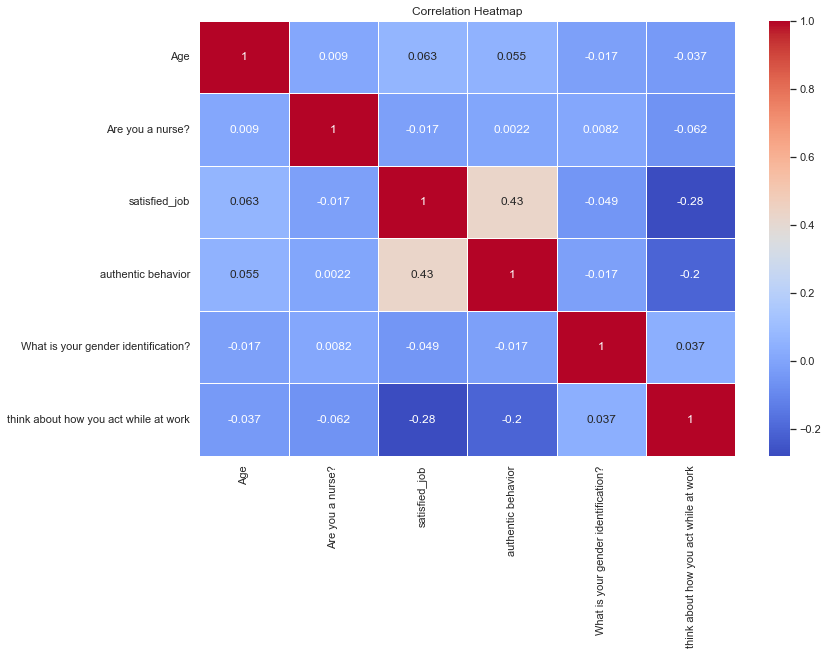

In [58]:
corr = df1[['Age','Are you a nurse?' ,'satisfied_job','authentic behavior','What is your gender identification?','think about how you act while at work']].corr()
sns.set (rc = {'figure.figsize':(12, 8)})
sns.heatmap(corr, annot=True, cmap='coolwarm',linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
